<a href="https://colab.research.google.com/github/ena2509/Project-Implemetation-of-SNN/blob/main/Project_Handwritten_Digits_Classification_for_ANN_and_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Downloading the dataset
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

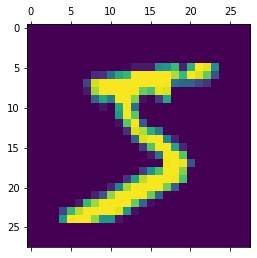

In [ ]:
plt.matshow(X_train[0])

In [ ]:
#Scaling the dataset
X_train=X_train/255
X_test= X_test/255

# **ANN Model**


In [ ]:
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='sigmoid')
])
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history=ann.fit(X_train, y_train,validation_split=0.33, epochs=10)

Epoch 1/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.2889 - accuracy: 0.9159 - val_loss: 0.1538 - val_accuracy: 0.9530
Epoch 2/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.1210 - accuracy: 0.9634 - val_loss: 0.1299 - val_accuracy: 0.9595
Epoch 3/10
1257/1257 [==============================] - 4s 3ms/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 0.1191 - val_accuracy: 0.9656
Epoch 4/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.1148 - val_accuracy: 0.9651
Epoch 5/10
1257/1257 [==============================] - 6s 4ms/step - loss: 0.0474 - accuracy: 0.9844 - val_loss: 0.1146 - val_accuracy: 0.9683
Epoch 6/10
1257/1257 [==============================] - 6s 5ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.1128 - val_accuracy: 0.9682
Epoch 7/10
1257/1257 [==============================] - 5s 4ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.1356 - val_accuracy:

In [ ]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


Text(69.0, 0.5, 'Truth')

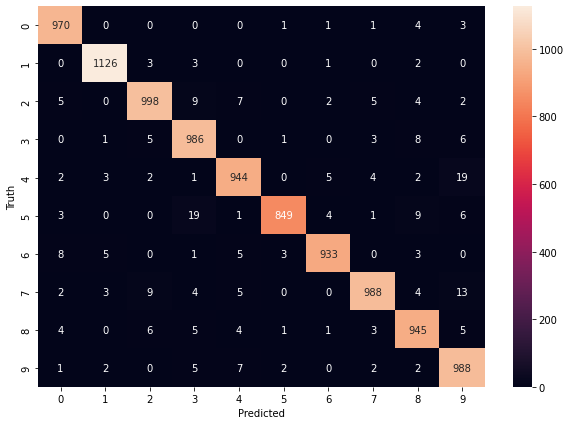

In [ ]:
y_predicted=ann.predict(X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]

cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1072 - accuracy: 0.9732


[0.1072436273097992, 0.9732000231742859]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


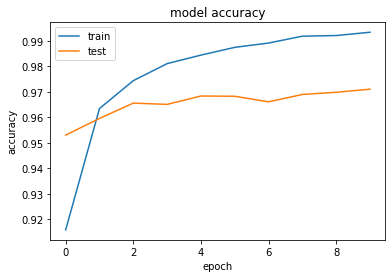

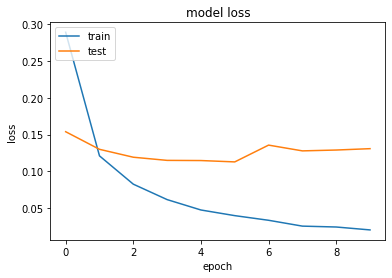

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CNN Model**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test=X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [ ]:
cnn=keras.Sequential([
    
    layers.Conv2D(filters=28, kernel_size=(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=28, kernel_size=(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history=cnn.fit(X_train, y_train,validation_split=0.33, epochs=10)

Epoch 1/10
1257/1257 [==============================] - 107s 28ms/step - loss: 0.1794 - accuracy: 0.9457 - val_loss: 0.0755 - val_accuracy: 0.9772
Epoch 2/10
1257/1257 [==============================] - 34s 27ms/step - loss: 0.0572 - accuracy: 0.9830 - val_loss: 0.0649 - val_accuracy: 0.9800
Epoch 3/10
1257/1257 [==============================] - 36s 29ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0452 - val_accuracy: 0.9866
Epoch 4/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0592 - val_accuracy: 0.9840
Epoch 5/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 6/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0500 - val_accuracy: 0.9854
Epoch 7/10
1257/1257 [==============================] - 36s 29ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0470 

In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 28)        7084      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 28)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 700)               0         
                                                                 
 dense_9 (Dense)             (None, 100)              

Text(69.0, 0.5, 'Truth')

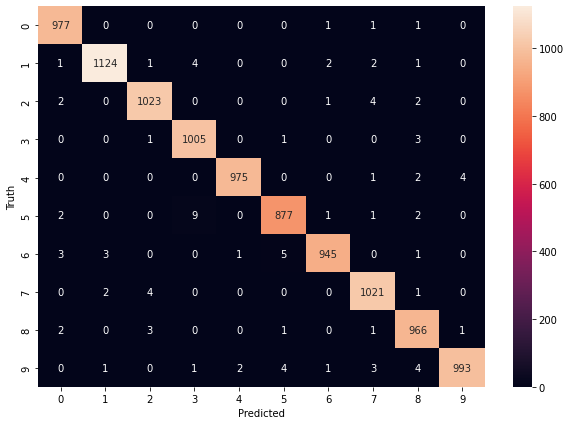

In [ ]:
y_predicted=cnn.predict(X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]

cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0358 - accuracy: 0.9909


[0.03583990037441254, 0.9908999800682068]

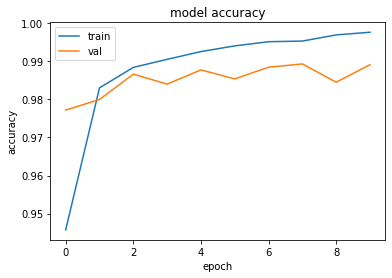

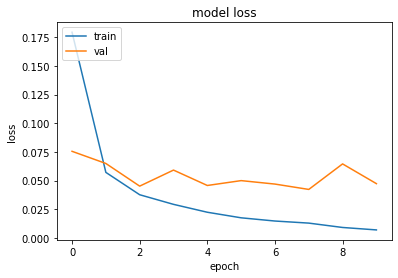

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()